This is the notebook for comparing the voronoi test results from the different environmental conditions:

1. natural in door
2. shade
3. high temperature
4. high light intensity

And see if that changes voronoi patterning of the leaf vein and hydathodes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.spatial import Voronoi
import scipy as sp
import scipy.stats as stats
from statannot import add_stat_annotation

import bambi as bmb 
import arviz as az

import sys
sys.path.insert(0, '../')
import graph_create, voronoi_local, jaccard_similarity, center_predict


WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def get_directory(condition):

    dot_folder = f'../data/environmental/dot_images/{condition}_dots'
    vein_folder = f'../data/environmental/vein_graphs/{condition}_txt'
    samples_csv =  f'../data/environmental/{condition}_samples.csv' 
    sample_df = pd.read_csv(samples_csv, delimiter=',', header = None, index_col= 0 )
    sample_df.columns = ['plant']
    
    return dot_folder, vein_folder, sample_df

In [3]:
def shape_dfs(data_arr, sample_df, value_name = 'error'):
    
    mean_df = pd.DataFrame(data_arr, index = sample_df.index, columns = ['hydathode','centroid','mid-point','random'])
    mean_df['plant'] = sample_df['plant'].values.tolist()
    mean_df['sample'] = mean_df.index

    melted_mean_df = mean_df.melt(id_vars= ['sample', 'plant'] , var_name='type', value_name= value_name)
    melted_mean_df["type"]  = pd.Categorical(melted_mean_df["type"].tolist(), categories = ['hydathode','centroid','mid-point','random'], ordered=True)

    return mean_df, melted_mean_df

-----
### 1. Local test (Voronoi I):

In [4]:
def local_error(sample, dot_folder, vein_folder):
    G = graph_create.graph_creation(sample, dot_folder, vein_folder )

    print('Perform local tests... \n')
    # local tests:
    adj_faces_mat, shared_edges_mat = voronoi_local.shared_edges(G, threshold = 50)
    rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat,G.graph['dots_passed'], G, dot_bool = True)

    # baseline local tests:
    cent_in_faces, mid_in_faces, rand_in_faces = voronoi_local.random_n_centroid(G)    
    centroid_rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat, cent_in_faces)
    midpoint_rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat ,mid_in_faces)
    random_rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat, rand_in_faces)

    G_dual = graph_create.make_dual(G, cent_in_faces, mid_in_faces, rand_in_faces, rst[0])

    baseline_summary = pd.DataFrame(np.array([rst[2].iloc[0].tolist(), centroid_rst[2].iloc[0].tolist(), midpoint_rst[2].iloc[0].tolist(), random_rst[2].iloc[0].tolist()]), 
                                    columns = ['angle_mean', 'angle_std', 'dist_mean', 'dist_std'],
                                    index = ['dot', 'centroid', 'midpoint','random'])

    angle_list = [baseline_summary['angle_mean'][0],
                        baseline_summary['angle_mean'][1],
                        baseline_summary['angle_mean'][2],
                        baseline_summary['angle_mean'][3]]

    dist_list = [baseline_summary['dist_mean'][0],
                        baseline_summary['dist_mean'][1],
                        baseline_summary['dist_mean'][2],
                        baseline_summary['dist_mean'][3]]

    print('Local tests done! \n')

    return angle_list, dist_list

In [5]:
def conditional_test(condition = 'control'):
    angle_mean_arr = np.zeros([20,4])
    dist_mean_arr = np.zeros([20,4])

    dot_folder, vein_folder, sample_df = get_directory(condition)

    for i, sample in enumerate(sample_df.index):
        angle_list, dist_list = local_error(sample, dot_folder, vein_folder)
        angle_mean_arr[i] = angle_list
        dist_mean_arr[i] = dist_list

    _, melted_angle_mean_df = shape_dfs(angle_mean_arr, sample_df, value_name = 'error')
    _, melted_dist_mean_df = shape_dfs(dist_mean_arr, sample_df, value_name = 'error')

    return melted_angle_mean_df, melted_dist_mean_df

In [6]:
control_angle_mean_df, control_dist_mean_df = conditional_test(condition ='control')
natural_angle_mean_df, natural_dist_mean_df = conditional_test(condition ='natural')
shade_angle_mean_df, shade_dist_mean_df  = conditional_test(condition ='shade')
heat_angle_mean_df, heat_dist_mean_df = conditional_test(condition ='heat')

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Grap

../voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
../voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
../voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
../voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find tes

../voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
../voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
../voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
../voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Perform local tests... 

Local tests done! 



In [8]:
def plot_test(results, df, condition = 'control', test = 'angle'):

    slopes = results.posterior.type.values
    intercept = results.posterior.Intercept.values
    intercept = intercept.reshape((5,2000,1))
    # whether use smaller or larger depend on the type of test!
    pvalues = [(slopes[:,:,0] <= 0).sum()/10000, (slopes[:,:,1] <= 0).sum()/10000, (slopes[:,:,2] <= 0).sum()/10000]
    pairs = [('hydathode', 'centroid'), ('hydathode', 'mid-point'), ('hydathode', 'random')]
    y_mean = [az.summary(results)['mean']['Intercept'],
            az.summary(results)['mean']['Intercept'] + az.summary(results)['mean']['type[centroid]'],
            az.summary(results)['mean']['Intercept'] + az.summary(results)['mean']['type[mid-point]'],
            az.summary(results)['mean']['Intercept'] + az.summary(results)['mean']['type[random]']]

    order = ['hydathode', 'centroid', 'mid-point', 'random']
    colors = ['chocolate','tab:red', 'mediumvioletred', 'purple']
    cmap = plt.cm.get_cmap('flare')

    sns.set_style("white")
    fig, ax = plt.subplots(figsize = (6,6))

    sns.stripplot (x = 'type', y = df.columns[-1], data = df, order = order, 
                palette = "flare", alpha = .25, size = 6, zorder=1,
                ax = ax)


    ax, test_results = add_stat_annotation(ax, data = df, x= 'type', y= df.columns[-1], order = order,
                        box_pairs = pairs,
                        perform_stat_test = False,
                        pvalues = pvalues,
                        loc='inside',
                        fontsize = 14)

    x = list(range(4))

    y_lower = [np.percentile(a = intercept, q = 2.5)] + np.percentile(a = slopes + intercept, axis = [0,1], q = 2.5).tolist()
    y_higher = [np.percentile(a = intercept, q = 97.5)] + np.percentile(a = slopes + intercept, axis = [0,1], q = 97.5).tolist()

    for i in range(4):
        ax.plot([x[i], x[i]], [y_lower[i], y_higher[i]],  c = colors[i], lw = 2)
    for i in range(4):
        ax.scatter(x[i], y_mean[i], c = colors[i], s = 75, zorder = 2)

        
    ax.set_title(f'{test} test for {condition} condition (n = 20)', fontsize = 15)
    ax.set_xticklabels(['hydathode', 'centroid', 'mid-point', 'random'], fontsize = 12)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    plt.show()

    

#### Example of inferencing test performance:

For heat condition only, but can be sawpped to other conditions.

In [103]:
heat_angle_model= bmb.Model("error ~ type + (1|plant)", heat_angle_mean_df, dropna=True, categorical = "type")
heat_angle_results =heat_angle_model.fit(chains=5, draws=2000)
heat_dist_model= bmb.Model("error ~ type + (1|plant)", heat_dist_mean_df, dropna=True, categorical = "type")
heat_dist_results = heat_dist_model.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, type, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 43 seconds.
There were 146 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7169, but should be close to 0.8. Try to increase the number of tuning steps.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, type, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 43 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: Custom statistical test, P_val:7.960e-02
hydathode v.s. mid-point: Custom statistical test, P_val:1.200e-03
hydathode v.s. random: Custom statistical test, P_val:0.000e+00


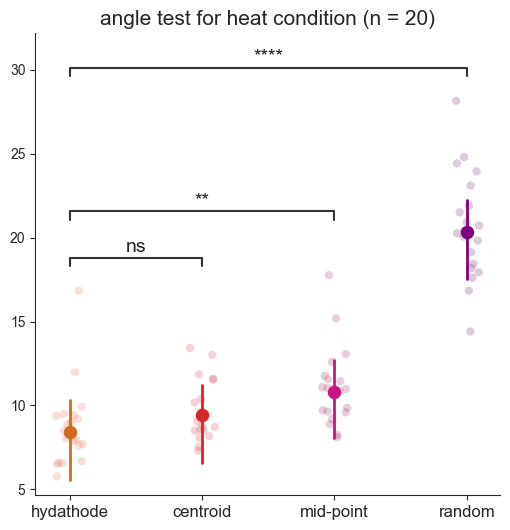

In [104]:
plot_test(heat_angle_results, heat_angle_mean_df, condition = 'heat', test = 'angle')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: Custom statistical test, P_val:0.000e+00
hydathode v.s. mid-point: Custom statistical test, P_val:0.000e+00
hydathode v.s. random: Custom statistical test, P_val:0.000e+00


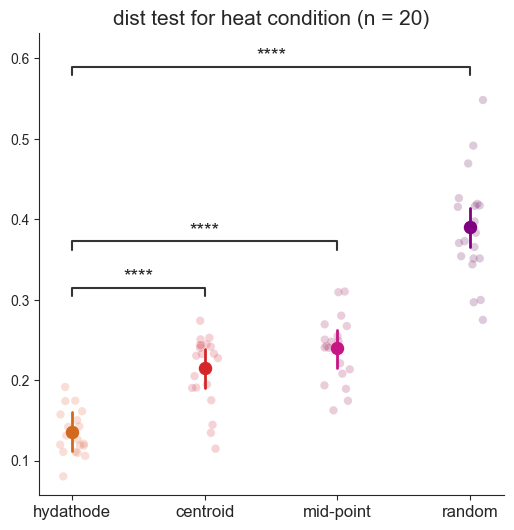

In [105]:
plot_test(heat_dist_results, heat_dist_mean_df, condition = 'heat', test = 'dist')

-------

### 2. Area test (Voronoi II):

In [10]:
def spatial_overlap(sample, dot_folder, vein_folder):
    
    G = graph_create.graph_creation(sample, dot_folder= dot_folder, vein_folder= vein_folder)

    seeds = [n for n in G.nodes if G.nodes[n]['type'] != 'vein']
    vor = Voronoi(seeds)
    bounded_regions = jaccard_similarity.bounded_polygons(G, vor)
    J_list = jaccard_similarity.overlap_test(G, seeds, bounded_regions)

    print(f'start area test for {sample}  \n')


    centroid_seeds, midpoint_seeds, random_seeds = jaccard_similarity.hybrid_seeds(G)

    centroid_vor = Voronoi(centroid_seeds)
    midpoint_vor =  Voronoi(midpoint_seeds)
    random_vor = Voronoi(random_seeds)

    centroid_bounded_regions = jaccard_similarity.bounded_polygons(G, centroid_vor)
    midpoint_bounded_regions = jaccard_similarity.bounded_polygons(G, midpoint_vor)
    random_bounded_regions = jaccard_similarity.bounded_polygons(G, random_vor)

    centroid_J_list = jaccard_similarity.overlap_test(G, seeds, centroid_bounded_regions)
    midpoint_J_list = jaccard_similarity.overlap_test(G, seeds, midpoint_bounded_regions)
    random_J_list = jaccard_similarity.overlap_test(G, seeds, random_bounded_regions)

    print(f'Finish area test. \n')

    return J_list.mean(), centroid_J_list.mean(), midpoint_J_list.mean(), random_J_list.mean()

In [11]:
def J_condition_test(condition = 'control'):
    
    J_mean_arr = np.zeros([20,4])
    
    dot_folder, vein_folder, sample_df = get_directory(condition)

    for i, sample in enumerate(sample_df.index):
        J_mean_arr[i] = spatial_overlap(sample, dot_folder, vein_folder)


    _, melted_J_mean_df = shape_dfs(J_mean_arr, sample_df, value_name = 'overlap')
    
    return melted_J_mean_df

        

In [12]:
control_J_df = J_condition_test(condition = 'control')
natural_J_df = J_condition_test(condition = 'natural')
shade_J_df = J_condition_test(condition = 'shade')
heat_J_df =  J_condition_test(condition = 'heat')

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for C1-1  

Finish area test. 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for C1-2  

Finish area test. 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

start area test for C1-3  

Finish area test. 

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces

#### Example showing test performace for Voronoi II test:


In [139]:
shade_J_model= bmb.Model("overlap ~ type + (1|plant)", shade_J_df, dropna=True, categorical = "type")
shade_J_results = shade_J_model.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, type, 1|plant_sigma, 1|plant_offset, overlap_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 63 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: Custom statistical test, P_val:0.000e+00
hydathode v.s. mid-point: Custom statistical test, P_val:0.000e+00
hydathode v.s. random: Custom statistical test, P_val:0.000e+00


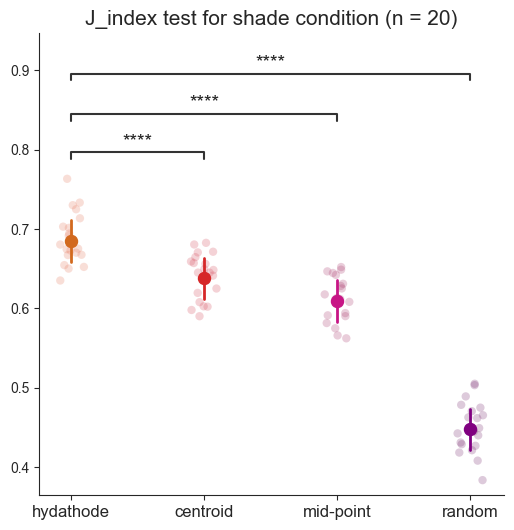

In [140]:
plot_test(shade_J_results, shade_J_df, condition = 'shade', test = 'J_index')

-------

### 3. Center prediction test (Voronoi III):

In [38]:
def size_M(sample, dot_folder, vein_folder):

    print(f'Predict center for {sample}  \n')

    G = graph_create.graph_creation(sample, dot_folder, vein_folder)

    adj_faces_mat, shared_edges_mat = voronoi_local.shared_edges(G, threshold = 50)
    rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat,G.graph['dots_passed'], G, dot_bool = True)
    cent_in_faces, mid_in_faces, rand_in_faces = voronoi_local.random_n_centroid(G)
    G_dual = graph_create.make_dual(G, cent_in_faces, mid_in_faces, rand_in_faces, rst[0])
    s_list, b_list, g_list, g_nodes_index = center_predict.slope_intercept_gcc(G, G_dual, shared_edges_mat)

    print(f'Center prediction done. \n')

    return len(s_list), len(g_list)

In [39]:
def center_error_gcc(sample, dot_folder, vein_folder):

    print(f'Predict center for {sample}  \n')

    G = graph_create.graph_creation(sample, dot_folder, vein_folder)

    adj_faces_mat, shared_edges_mat = voronoi_local.shared_edges(G, threshold = 50)
    rst = voronoi_local.local_test(adj_faces_mat, shared_edges_mat,G.graph['dots_passed'], G, dot_bool = True)
    cent_in_faces, mid_in_faces, rand_in_faces = voronoi_local.random_n_centroid(G)
    G_dual = graph_create.make_dual(G, cent_in_faces, mid_in_faces, rand_in_faces, rst[0])
    s_list, b_list, g_list, g_nodes_index = center_predict.slope_intercept_gcc(G, G_dual, shared_edges_mat)
    predicted_centers = center_predict.solve_lin_system_gcc(s_list, b_list, g_list)
    
    cent_list = [cent_in_faces[g_nodes_index[node]] for node in g_list]
    mid_list = [mid_in_faces[g_nodes_index[node]] for node in g_list ]
    rand_list = [rand_in_faces[g_nodes_index[node]] for node in g_list ]

    # errors:
    mean_dist = center_predict.mean_err(predicted_centers, g_list)
    cent_dist = center_predict.mean_err(predicted_centers, cent_list)
    mid_dist = center_predict.mean_err(predicted_centers, mid_list)
    rand_dist = center_predict.mean_err(predicted_centers, rand_list)

    print(f'Center prediction done. \n')

    return mean_dist, cent_dist, mid_dist, rand_dist

In [40]:
def prediction_gcc(condition = 'control'):
    size_df = np.zeros([20,2]) 
    dot_folder, vein_folder, sample_df = get_directory(condition)

    for i, sample in enumerate(sample_df.index):       
        size_df[i] = size_M(sample, dot_folder, vein_folder)

    notpassed  = size_df[:, 0] <= size_df[:, 1]
    sample_df = sample_df.drop(index =  sample_df.index[np.where(notpassed)[0]])
    
    predict_err_arr = np.zeros([len(sample_df),4])
    
    for i, sample in enumerate(sample_df.index):
        predict_err_arr[i] = center_error_gcc(sample, dot_folder, vein_folder)

    _, predict_err_df = shape_dfs(predict_err_arr, sample_df, value_name = 'error')

    return predict_err_df

In [41]:
control_pred_error_gcc = prediction_gcc(condition = 'control')
natural_pred_error_gcc = prediction_gcc(condition = 'natural')
shade_pred_error_gcc = prediction_gcc(condition = 'shade')
heat_pred_error_gcc = prediction_gcc(condition = 'heat')

Predict center for C1-1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for C1-2  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for C1-3  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for C1-4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: mer

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for N6-1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for N6-2  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for N6-4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for N1-1  

Creatin

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for N6-1  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for N6-2  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for N6-4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for S1-1  

Creatin

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for H6-6  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for H1-2  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for H1-4  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 

Predict center for H2-2  

Creatin

/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])
/Users/xinzheng/Desktop/Desktop/VeinTessellation/pilea_voronoi_test/voronoi_local.py:20: RuntimeWarning: divide by zero encountered in long_scalars
  s = (p1[1] - p2[1])/(p1[0] - p2[0])


Graph creation completed.

Center prediction done. 

Predict center for H6-6  

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Center prediction done. 



In [46]:
pd.pivot(heat_pred_error_gcc, index=["sample", 'plant'], columns = ['type']).describe()

error                                    
type    hydathode    centroid   mid-point      random
count   17.000000   17.000000   17.000000   17.000000
mean   193.213533  231.878636  240.098481  308.577740
std     99.023940  104.275601  105.402223  104.783095
min     83.836490   98.801450  106.192864  145.111962
25%    131.159680  186.274143  193.173757  247.062326
50%    177.053670  199.183875  219.783366  289.872831
75%    215.134842  261.850661  260.003102  339.158757
max    463.543481  539.936361  545.085808  572.308875

In [215]:
shade_pred_model= bmb.Model("error ~ type + (1|plant)", shade_pred_error_gcc, dropna=True, categorical = "type")
shade_pred_results = shade_pred_model.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, type, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 61 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


In [216]:
natural_pred_model= bmb.Model("error ~ type + (1|plant)", natural_pred_error_gcc, dropna=True, categorical = "type")
natural_pred_results = natural_pred_model.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, type, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 48 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 28 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


In [223]:
heat_pred_model= bmb.Model("error ~ type + (1|plant)", heat_pred_error_gcc, dropna=True, categorical = "type")
heat_pred_results = heat_pred_model.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, type, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 45 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.


In [218]:
control_pred_model= bmb.Model("error ~ type + (1|plant)", control_pred_error_gcc, dropna=True, categorical = "type")
control_pred_results = control_pred_model.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, type, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 52 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 46 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6399, but should be close to 0.8. Try to increase the number of tuning steps.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.


#### Test result example for Voronoi III (heat)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

hydathode v.s. centroid: Custom statistical test, P_val:1.618e-01
hydathode v.s. mid-point: Custom statistical test, P_val:1.085e-01
hydathode v.s. random: Custom statistical test, P_val:2.000e-03


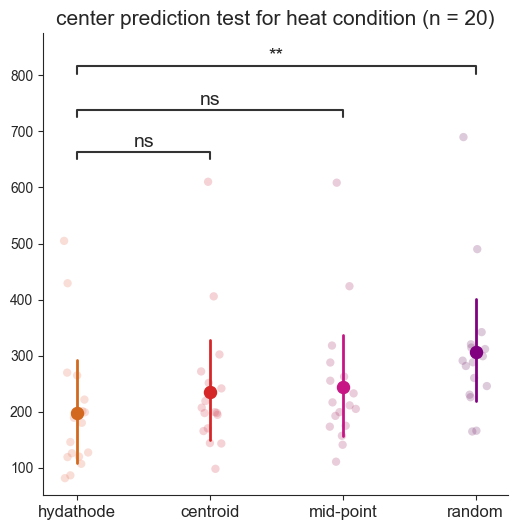

In [224]:
plot_test(heat_pred_results, heat_pred_error_gcc, condition = 'heat', test = 'center prediction')

-----
### 4. Composite the results and compare between conditions

We saw that for all conditions, hydathodes out-perform other pointsets. But what about between different conditions?

In the plotting we use different shade of colors to represent individual plants.

In [249]:
heat_pred = heat_pred_error_gcc[heat_pred_error_gcc['type'] == 'hydathode'][['error', 'plant']]
control_pred = control_pred_error_gcc[control_pred_error_gcc['type'] == 'hydathode'][['error', 'plant']]
natural_pred = natural_pred_error_gcc[natural_pred_error_gcc['type'] == 'hydathode'][['error', 'plant']]
shade_pred = shade_pred_error_gcc[shade_pred_error_gcc['type'] == 'hydathode'][['error', 'plant']]
heat_pred['condition'] = 'heat'
heat_pred['plant'] = heat_pred['condition'] + heat_pred['plant'].astype(str)
control_pred['condition'] = 'control'
control_pred['plant'] = control_pred['condition'] + control_pred['plant'].astype(str)
natural_pred['condition'] = 'natural'
natural_pred['plant'] = natural_pred['condition'] + natural_pred['plant'].astype(str)
shade_pred['condition'] = 'shade'
shade_pred['plant'] = shade_pred['condition'] + shade_pred['plant'].astype(str)
all_pred = pd.concat([control_pred, shade_pred, natural_pred, heat_pred])

In [250]:
heat_angle = heat_angle_mean_df[heat_angle_mean_df['type'] == 'hydathode'][['error', 'plant']]
control_angle = control_angle_mean_df[control_angle_mean_df['type'] == 'hydathode'][['error', 'plant']]
natural_angle = natural_angle_mean_df[natural_angle_mean_df['type'] == 'hydathode'][['error', 'plant']]
shade_angle = shade_angle_mean_df[shade_angle_mean_df['type'] == 'hydathode'][['error', 'plant']]
heat_angle['condition'] = 'heat'
heat_angle['plant'] = heat_angle['condition'] + heat_angle['plant'].astype(str)
control_angle['condition'] = 'control'
control_angle['plant'] = control_angle['condition'] + control_angle['plant'].astype(str)
natural_angle['condition'] = 'natural'
natural_angle['plant'] = natural_angle['condition'] + natural_angle['plant'].astype(str)
shade_angle['condition'] = 'shade'
shade_angle['plant'] = shade_angle['condition'] + shade_angle['plant'].astype(str)
all_angle = pd.concat([control_angle, shade_angle, natural_angle, heat_angle])

In [251]:
heat_dist = heat_dist_mean_df[heat_dist_mean_df['type'] == 'hydathode'][['error', 'plant']]
control_dist = control_dist_mean_df[control_dist_mean_df['type'] == 'hydathode'][['error', 'plant']]
natural_dist = natural_dist_mean_df[natural_dist_mean_df['type'] == 'hydathode'][['error', 'plant']]
shade_dist = shade_dist_mean_df[shade_dist_mean_df['type'] == 'hydathode'][['error', 'plant']]
heat_dist['condition'] = 'heat'
heat_dist['plant'] = heat_dist['condition'] + heat_dist['plant'].astype(str)
control_dist['condition'] = 'control'
control_dist['plant'] = control_dist['condition'] + control_dist['plant'].astype(str)
natural_dist['condition'] = 'natural'
natural_dist['plant'] = natural_dist['condition'] + natural_dist['plant'].astype(str)
shade_dist['condition'] = 'shade'
shade_dist['plant'] = shade_dist['condition'] + shade_dist['plant'].astype(str)

all_dist = pd.concat([control_dist, shade_dist, natural_dist, heat_dist])

In [252]:
heat_J = heat_J_df[heat_J_df['type'] == 'hydathode'][['overlap', 'plant']]
control_J = control_J_df[control_J_df['type'] == 'hydathode'][['overlap', 'plant']]
natural_J = natural_J_df[natural_J_df['type'] == 'hydathode'][['overlap', 'plant']]
shade_J = shade_J_df[shade_J_df['type'] == 'hydathode'][['overlap', 'plant']]
heat_J['condition'] = 'heat'
heat_J['plant'] = heat_J['condition'] + heat_J['plant'].astype(str)
control_J['condition'] = 'control'
control_J['plant'] = control_J['condition'] + control_J['plant'].astype(str)
natural_J['condition'] = 'natural'
natural_J['plant'] = natural_J['condition'] + natural_J['plant'].astype(str)
shade_J['condition'] = 'shade'
shade_J['plant'] = shade_J['condition'] + shade_J['plant'].astype(str)

all_J = pd.concat([control_J, shade_J, natural_J, heat_J])

In [271]:
all_J["condition"]  = pd.Categorical(all_J["condition"].tolist(), categories = ['natural','shade','heat','control'], ordered=True)
all_angle["condition"]  = pd.Categorical(all_angle["condition"].tolist(), categories = ['natural','shade','heat','control'], ordered=True)
all_dist["condition"]  = pd.Categorical(all_dist["condition"].tolist(), categories = ['natural','shade','heat','control'], ordered=True)
all_pred["condition"]  = pd.Categorical(all_pred["condition"].tolist(), categories = ['natural','shade','heat','control'], ordered=True)


In [272]:
# create bayesian model again
all_J_model= bmb.Model("overlap ~ condition + (1|plant)", all_J, dropna=True, categorical = "condition")
all_J_results = all_J_model.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, condition, 1|plant_sigma, 1|plant_offset, overlap_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 57 seconds.


In [273]:
all_angle_model= bmb.Model("error ~ condition + (1|plant)", all_angle, dropna=True, categorical = "condition")
all_angle_results = all_angle_model.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, condition, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 40 seconds.


In [274]:
all_dist_model= bmb.Model("error ~ condition + (1|plant)", all_dist, dropna=True, categorical = "condition")
all_dist_results = all_dist_model.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, condition, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 46 seconds.


In [275]:
all_pred_model= bmb.Model("error ~ condition + (1|plant)", all_pred, dropna=True, categorical = "condition")
all_pred_results = all_pred_model.fit(chains=5, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [Intercept, condition, 1|plant_sigma, 1|plant_offset, error_sigma]


Sampling 5 chains for 1_000 tune and 2_000 draw iterations (5_000 + 10_000 draws total) took 43 seconds.
The acceptance probability does not match the target. It is 0.8892, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8844, but should be close to 0.8. Try to increase the number of tuning steps.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6498, but should be close to 0.8. Try to increase the number of tuning steps.
There were 19 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6157, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6807, but should be cl

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

natural v.s. shade: Custom statistical test, P_val:2.866e-01
natural v.s. heat: Custom statistical test, P_val:3.263e-01
natural v.s. control: Custom statistical test, P_val:3.040e-02


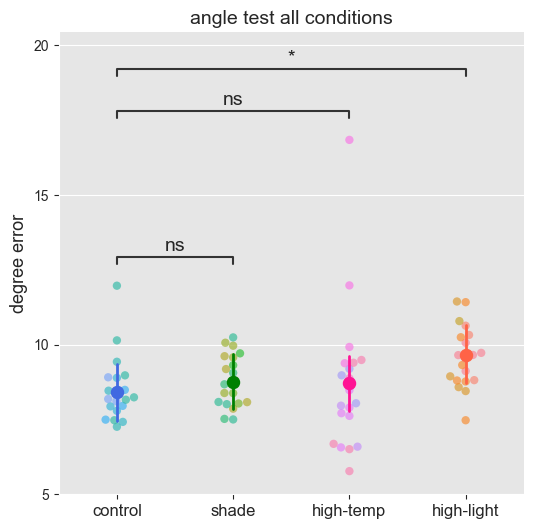

In [283]:
colors_mean = ['royalblue', 'green', 'deeppink', 'tomato']

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

slopes = all_angle_results.posterior.condition.values
intercept = all_angle_results.posterior.Intercept.values
intercept = intercept.reshape((5,2000,1))
# whether use smaller or larger depend on the type of test!
pvalues = [(slopes[:,:,0] <= 0).sum()/10000, (slopes[:,:,1] <= 0).sum()/10000, (slopes[:,:,2] <= 0).sum()/10000]
pairs = [('natural', 'shade'), ('natural', 'heat'), ('natural', 'control')]
y_mean = [az.summary(all_angle_results)['mean']['Intercept'],
        az.summary(all_angle_results)['mean']['Intercept'] + az.summary(all_angle_results)['mean']['condition[shade]'],
        az.summary(all_angle_results)['mean']['Intercept'] + az.summary(all_angle_results)['mean']['condition[heat]'],
        az.summary(all_angle_results)['mean']['Intercept'] + az.summary(all_angle_results)['mean']['condition[control]']]
        
fig, ax = plt.subplots(figsize = (6,6))

order = ['natural', 'shade', 'heat', 'control']


sns.swarmplot (data = all_angle, x = 'condition', y = 'error',  hue = 'plant',
            alpha = .7, size = 6, zorder=1,
            ax = ax)



ax, test_results = add_stat_annotation(ax, data = all_angle, x = 'condition', y = 'error',  order = order,
                    box_pairs = pairs,
                    perform_stat_test = False,
                    pvalues = pvalues,
                    loc='inside',
                    fontsize = 14)

x = list(range(4))
y_lower = [np.percentile(a = intercept, q = 2.5)] + np.percentile(a = intercept + slopes, axis = [0,1], q = 2.5).tolist()
y_higher = [np.percentile(a = intercept, q = 97.5)] + np.percentile(a = intercept + slopes, axis = [0,1], q = 97.5).tolist()

for i in range(4):
    ax.plot([x[i], x[i]], [y_lower[i], y_higher[i]],  c = colors_mean[i], lw = 2)
for i in range(4):
    ax.scatter(x[i], y_mean[i],  c = colors_mean[i], s = 75, zorder = 2)


ax.set_xticklabels(['control', 'shade', 'high-temp', 'high-light'], fontsize = 12)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_ylabel('degree error', fontsize = 13)
ax.set_yticks([5, 10, 15, 20], fontsize = 12)
ax.set_title('angle test all conditions', fontsize = 14)
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.legend([],[], frameon=False)

plt.show()

# np.savetxt(f'bayesian_plots/environmental/all_angles_pvals.csv', pvalues, delimiter= ',')
# fig.savefig(f'bayesian_plots/environmental/all_condition_angle_test.pdf')



p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

natural v.s. shade: Custom statistical test, P_val:7.545e-01
natural v.s. heat: Custom statistical test, P_val:5.257e-01
natural v.s. control: Custom statistical test, P_val:7.883e-01


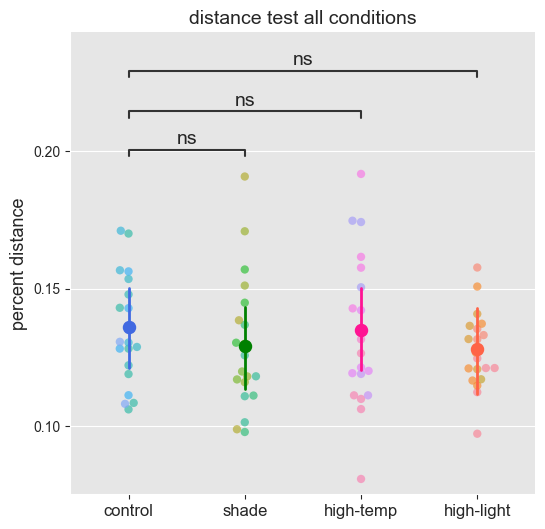

In [286]:
colors_mean = ['royalblue', 'green', 'deeppink', 'tomato']

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

slopes = all_dist_results.posterior.condition.values
intercept = all_dist_results.posterior.Intercept.values
intercept = intercept.reshape((5,2000,1))
# whether use smaller or larger depend on the type of test!
pvalues = [(slopes[:,:,0] <= 0).sum()/10000, (slopes[:,:,1] <= 0).sum()/10000, (slopes[:,:,2] <= 0).sum()/10000]
pairs = [('natural', 'shade'), ('natural', 'heat'), ('natural', 'control')]
y_mean = [az.summary(all_dist_results)['mean']['Intercept'],
        az.summary(all_dist_results)['mean']['Intercept'] + az.summary(all_dist_results)['mean']['condition[shade]'],
        az.summary(all_dist_results)['mean']['Intercept'] + az.summary(all_dist_results)['mean']['condition[heat]'],
        az.summary(all_dist_results)['mean']['Intercept'] + az.summary(all_dist_results)['mean']['condition[control]']]
        
fig, ax = plt.subplots(figsize = (6,6))

order = ['natural', 'shade', 'heat', 'control']


sns.swarmplot (data = all_dist, x = 'condition', y = 'error',  hue = 'plant',
            alpha = .7, size = 6, zorder=1,
            ax = ax)



ax, test_results = add_stat_annotation(ax, data = all_dist, x = 'condition', y = 'error',  order = order,
                    box_pairs = pairs,
                    perform_stat_test = False,
                    pvalues = pvalues,
                    loc='inside',
                    fontsize = 14)

x = list(range(4))
y_lower = [np.percentile(a = intercept, q = 2.5)] + np.percentile(a = intercept + slopes, axis = [0,1], q = 2.5).tolist()
y_higher = [np.percentile(a = intercept, q = 97.5)] + np.percentile(a = intercept + slopes, axis = [0,1], q = 97.5).tolist()

for i in range(4):
    ax.plot([x[i], x[i]], [y_lower[i], y_higher[i]],  c = colors_mean[i], lw = 2)
for i in range(4):
    ax.scatter(x[i], y_mean[i],  c = colors_mean[i], s = 75, zorder = 2)


ax.set_xticklabels(['control', 'shade', 'high-temp', 'high-light'], fontsize = 12)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_ylabel('percent distance', fontsize = 13)
ax.set_yticks([.1, .15, .20], fontsize = 12)
ax.set_title('distance test all conditions', fontsize = 14)
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.legend([],[], frameon=False)

plt.show()

# np.savetxt(f'bayesian_plots/environmental/all_dists_pvals.csv', pvalues, delimiter= ',')
# fig.savefig(f'bayesian_plots/environmental/all_condition_dist_test.pdf')



p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

natural v.s. shade: Custom statistical test, P_val:6.040e-02
natural v.s. heat: Custom statistical test, P_val:4.544e-01
natural v.s. control: Custom statistical test, P_val:2.722e-01


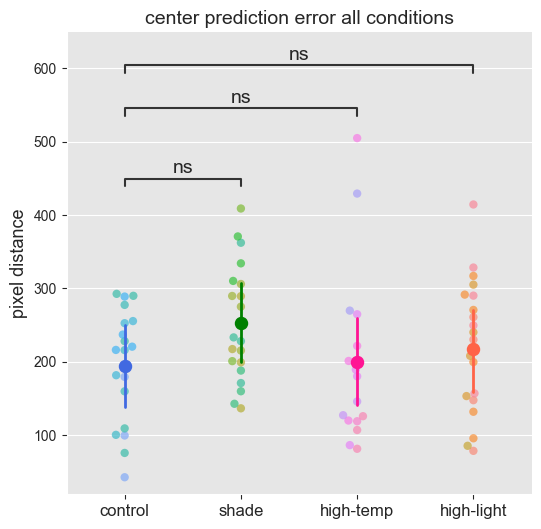

In [287]:
colors_mean = ['royalblue', 'green', 'deeppink', 'tomato']

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

slopes = all_pred_results.posterior.condition.values
intercept = all_pred_results.posterior.Intercept.values
intercept = intercept.reshape((5,2000,1))
# whether use smaller or larger depend on the type of test!
pvalues = [(slopes[:,:,0] <= 0).sum()/10000, (slopes[:,:,1] <= 0).sum()/10000, (slopes[:,:,2] <= 0).sum()/10000]
pairs = [('natural', 'shade'), ('natural', 'heat'), ('natural', 'control')]
y_mean = [az.summary(all_pred_results)['mean']['Intercept'],
        az.summary(all_pred_results)['mean']['Intercept'] + az.summary(all_pred_results)['mean']['condition[shade]'],
        az.summary(all_pred_results)['mean']['Intercept'] + az.summary(all_pred_results)['mean']['condition[heat]'],
        az.summary(all_pred_results)['mean']['Intercept'] + az.summary(all_pred_results)['mean']['condition[control]']]
        
fig, ax = plt.subplots(figsize = (6,6))

order = ['natural', 'shade', 'heat', 'control']


sns.swarmplot (data = all_pred, x = 'condition', y = 'error',  hue = 'plant',
            alpha = .7, size = 6, zorder=1,
            ax = ax)



ax, test_results = add_stat_annotation(ax, data = all_pred, x = 'condition', y = 'error',  order = order,
                    box_pairs = pairs,
                    perform_stat_test = False,
                    pvalues = pvalues,
                    loc='inside',
                    fontsize = 14)

x = list(range(4))
y_lower = [np.percentile(a = intercept, q = 2.5)] + np.percentile(a = intercept + slopes, axis = [0,1], q = 2.5).tolist()
y_higher = [np.percentile(a = intercept, q = 97.5)] + np.percentile(a = intercept + slopes, axis = [0,1], q = 97.5).tolist()

for i in range(4):
    ax.plot([x[i], x[i]], [y_lower[i], y_higher[i]],  c = colors_mean[i], lw = 2)
for i in range(4):
    ax.scatter(x[i], y_mean[i],  c = colors_mean[i], s = 75, zorder = 2)


ax.set_xticklabels(['control', 'shade', 'high-temp', 'high-light'], fontsize = 12)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_ylabel('pixel distance', fontsize = 13)
# ax.set_yticks([.1, .15, .20], fontsize = 12)
ax.set_title('center prediction error all conditions', fontsize = 14)
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.legend([],[], frameon=False)

plt.show()

# np.savetxt(f'bayesian_plots/environmental/all_pred_pvals.csv', pvalues, delimiter= ',')
# fig.savefig(f'bayesian_plots/environmental/all_condition_pred_test.pdf')

